In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os


# Q2 Celebrity facematching
# Compute LBP Histogram of img
def histAndlbp(img):
    height, width = img.shape
    img_lbp = np.zeros(img.shape)
    array_hist = np.zeros(256)
    for row in range(0, height):
        for col in range(0, width):
            img_test = np.zeros((3, 3))
            for i in range(0, 3):
                for j in range(0, 3):
                    # Binary value is always zero when outside of image range
                    if (row + (i - 1) >= height) or (row + (i - 1) < 0) or (col + (j - 1) >= width) or (
                            col + (j - 1) < 0):
                        img_test[i, j] = 0
                    # Fills lbp_ker with binary values for pixel (row,col)
                    elif (img[row + (i - 1), col + (j - 1)] >= img[row, col]):
                        img_test[i, j] = 1
                    else:
                        img_test[i, j] = 0
            # Set value for each pixel to decimal value extracted from lbp_ker
            img_lbp[row, col] = np.int(
                img_test[1, 0] * 128 + img_test[2, 0] * 64 + img_test[2, 1] * 32 + img_test[2, 2] * 16 + img_test[
                    1, 2] * 8 + img_test[0, 2] * 4 + img_test[0, 1] * 2 + img_test[0, 0])
            array_hist[np.int(img_lbp[row, col])] = array_hist[np.int(img_lbp[row, col])] + 1
    # Normalize histogram data
    array_hist = array_hist / (np.linalg.norm(array_hist))
    return array_hist


# Computes LBP Descriptor of img by splitting image in 7x7 cell array
def lbp_descriptor(img):
    #print(type(img))
    #cv2.imshow('asdfasdf', img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows

    height, width = img.shape
    img_des = np.zeros((7, 7, 256))
    # Calculate historgram for all but last 18 x 21 box
    for cell_row in range(0, 6):
        for cell_col in range(0, 5):
            part_img = np.zeros((18, 21))
            part_img = img[cell_row * 18:(cell_row + 1) * 18, cell_col * 21:(cell_col + 1) * 21]
            img_des[cell_row, cell_col] = histAndlbp(part_img)
    # Calculate histogram for last box
    for sliver_row in range(0, 6):
        sliver_temp = np.zeros((18, 2))
        sliver_temp = img[sliver_row * 18:(sliver_row + 1) * 18, 127:128]
        img_des[sliver_row, 6] = histAndlbp(sliver_temp)

    return img_des


# Computes descriptor of all imgs and finds best match
def face_match(img):
    # Compute selfie descriptor
    myface_des = lbp_descriptor(img)
    best_match = '0'
    i = 0
    small_sqrtdif = 1000000000
    # Compute and compare celebrity descriptor
    for dirname, dirnames, filenames in os.walk('/Users/lordent/Desktop/School/Python/Practice/OpenCV/Ass2/img_align_celeba/img_sample'):
        # print path to all filenames.
        for filename in filenames:
            #print('file name is '+filename)
            temp_comp = cv2.imread('/Users/lordent/Desktop/School/Python/Practice/OpenCV/Ass2/img_align_celeba/img_sample/' + filename, cv2.IMREAD_GRAYSCALE)
            temp_des = lbp_descriptor(temp_comp)
            sqrtdif = 0

            # Compute sum of squared difference for every image
            for cell_row in range(0, 6):
                for cell_col in range(0, 6):
                    for hist_pos in range(0, 255):
                        sqrtdif = sqrtdif + (
                        (myface_des[cell_row, cell_col, hist_pos] - temp_des[cell_row, cell_col, hist_pos]) ** 2)
            if (sqrtdif < small_sqrtdif):
                small_sqrtdif = sqrtdif
                best_match = filename

    display_image = cv2.imread('/Users/lordent/Desktop/School/Python/Practice/OpenCV/Ass2/img_align_celeba/img_sample/' + best_match)
    cv2.imshow("Imput image", img)
    cv2.imshow("Matching with", display_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


img = cv2.imread('202594.jpg', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (128, 128))
face_match(img_resized)


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('20170203_210437.jpg', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (480, 640))
img2 = cv2.imread('20170203_210440.jpg', cv2.IMREAD_GRAYSCALE)
img2_resized = cv2.resize(img2, (480, 640))

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

bf = cv2.BFMatcher(cv2.NORM_L2)

# Compute SIFT descriptors
keypoints,descriptors = sift.detectAndCompute(img_resized, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2_resized, None)

match = bf.match(descriptors, descriptors2)

#Match the best 50
matche = sorted(match, key = lambda x:x.distance)
img3 = cv2.drawMatches(img_resized, keypoints, img2_resized, keypoints2, matche[:100], None)

#show
cv2.imshow('match', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

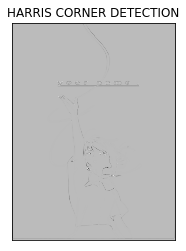

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Filter the image with given n x n matrix
def kernel_filter (img, kernel):
	height, width = img.shape
	kernel_height, kernel_width = kernel.shape

	mtx_multiply = np.zeros((kernel_height, kernel_width), dtype = np.float64)
	img_convert = np.zeros((kernel_height, kernel_width), dtype = np.float64)

	img_filter = np.zeros(((height+2), (width+2)), dtype = np.float64)

	for row in range(1, height-1):
		for col in range(1, width-1):
			mtx_multiply = img[(row - 1): (row + 2), (col - 1): (col + 2)]

			img_convert = kernel*mtx_multiply
			img_filter[row, col] = img_convert.sum()
	#return the filtered image file
	return img_filter

#Call an image and rezise it into 480x640
img = cv2.imread('https-%2F%2Fpbs.twimg.com%2Fmedia%2FCx-wU9tVIAAOLdS.jpg', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (480, 640))
height, width = img_resized.shape
#zero padded image
img_pad = np.zeros(((height + 2), (width + 2)), dtype=np.float64)

for row in range(0, height):
    for col in range(0, width):
        img_pad[row + 1, col + 1] = img_resized[row, col]

kernel_ver = np.array([(1, 2, 1), (0, 0, 0), (-1, -2, -1)])
kernel_hor = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)])
kernel_gauss = np.array([(1/16, 2/16, 1/16), (2/16, 4/16, 2/16), (1/16, 2/16, 1/16)])

img_gauss = kernel_filter(img_pad, kernel_gauss)
img_x_der = kernel_filter(img_pad, kernel_hor)
img_y_der = kernel_filter(img_pad, kernel_ver)
img_x_gauss = kernel_filter(img_x_der, kernel_gauss)
img_y_gauss = kernel_filter(img_y_der, kernel_gauss)

img_x2 = img_x_der*img_x_der
img_y2 = img_y_der*img_y_der
img_xy = img_x_der*img_y_der

g_img_x2 = kernel_filter(img_x2, kernel_gauss)
g_img_y2 = kernel_filter(img_y2, kernel_gauss)
g_img_xy = kernel_filter(img_xy, kernel_gauss)

img_harris = g_img_x2*g_img_y2 - g_img_xy*g_img_xy - 0.12*(g_img_x2+g_img_y2)*(g_img_x2+g_img_y2)

plt.subplot(), plt.imshow(img_harris, cmap = 'gray'), plt.title('HARRIS CORNER DETECTION')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
I tried it with 20k photos, and decided to reduce to 1k because it takes too long time

'''